# data 

In [35]:
import pandas as pd
import numpy as np

In [36]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/exp_data/gamedata.pickle',"rb") as dt:
    data = pickle.load(dt)

In [37]:
data

{'102844212430075086':           Time                 Timestamp  blue_gold  blue_towers  blue_barons  \
 0     11-13-18  2019-10-02T11:13:18.688Z       2500            0            0   
 1     11-13-19  2019-10-02T11:13:19.709Z       2500            0            0   
 2     11-13-20  2019-10-02T11:13:20.038Z       2500            0            0   
 3     11-13-21  2019-10-02T11:13:21.057Z       2500            0            0   
 4     11-13-22  2019-10-02T11:13:22.081Z       2500            0            0   
 ...        ...                       ...        ...          ...          ...   
 2243  11-51-17  2019-10-02T11:51:17.076Z      61767            3            0   
 2244  11-51-18  2019-10-02T11:51:18.375Z      61864            3            0   
 2245  11-51-19  2019-10-02T11:51:19.394Z      61875            3            0   
 2246  11-51-20  2019-10-02T11:51:20.416Z      61885            3            0   
 2247  11-51-21  2019-10-02T11:51:21.804Z      61900            3           

In [38]:
for game in data.keys():
    data[game]['Time'] = list(map(lambda x:int(x.split('-')[0])*3600+int(x.split('-')[1])*60+int(x.split('-')[2]),data[game]['Time']))

In [39]:
data

{'102844212430075086':        Time                 Timestamp  blue_gold  blue_towers  blue_barons  \
 0     40398  2019-10-02T11:13:18.688Z       2500            0            0   
 1     40399  2019-10-02T11:13:19.709Z       2500            0            0   
 2     40400  2019-10-02T11:13:20.038Z       2500            0            0   
 3     40401  2019-10-02T11:13:21.057Z       2500            0            0   
 4     40402  2019-10-02T11:13:22.081Z       2500            0            0   
 ...     ...                       ...        ...          ...          ...   
 2243  42677  2019-10-02T11:51:17.076Z      61767            3            0   
 2244  42678  2019-10-02T11:51:18.375Z      61864            3            0   
 2245  42679  2019-10-02T11:51:19.394Z      61875            3            0   
 2246  42680  2019-10-02T11:51:20.416Z      61885            3            0   
 2247  42681  2019-10-02T11:51:21.804Z      61900            3            0   
 
       blue_totalKills  blue

In [40]:
for game in data.keys():
    init = data[game]['Time'][0]
    data[game]['Time'] = list(map(lambda x:x-init,data[game]['Time']))

In [41]:
data = data['102844212430075086']

In [42]:
datas = pd.DataFrame(columns = data.columns)
first = data.loc[0]['Time']
time = first
index = 0
while(time <2283):
    temp = data.loc[[index],:]
    if int(temp['Time']) == time :
        datas = pd.concat([datas, temp],ignore_index=True)
        index+=1
    else:
        temp['Time'] =time
        datas = pd.concat([datas, temp],ignore_index=True)
    time +=1
    


In [43]:
datas = datas.drop(['Time'],axis='columns')
datas

Timestamp blue_gold blue_towers blue_barons  \
0     2019-10-02T11:13:18.688Z      2500           0           0   
1     2019-10-02T11:13:19.709Z      2500           0           0   
2     2019-10-02T11:13:20.038Z      2500           0           0   
3     2019-10-02T11:13:21.057Z      2500           0           0   
4     2019-10-02T11:13:22.081Z      2500           0           0   
...                        ...       ...         ...         ...   
2278  2019-10-02T11:51:16.318Z     61767           3           0   
2279  2019-10-02T11:51:17.076Z     61767           3           0   
2280  2019-10-02T11:51:18.375Z     61864           3           0   
2281  2019-10-02T11:51:19.394Z     61875           3           0   
2282  2019-10-02T11:51:20.416Z     61885           3           0   

     blue_totalKills blue_dragons red_gold red_towers red_barons  \
0                  0            0     2500          0          0   
1                  0            0     2500          0          0   
2                  0            0     2500          0          0   
3                  0            0     2500          0          0   
4                  0            0     2500          0          0   
...              ...          ...      ...        ...        ...   
2278               8            0    68519         11          2   
2279               8            0    68519         11          2   
2280               8            0    68590         11          2   
2281               8            0    68600         11          2   
2282               8            0    68610         11          2   

     red_totalKills red_dragons  
0                 0           0  
1                 0           0  
2                 0           0  
3                 0           0  
4                 0           0  
...             ...         ...  
2278             16           4  
2279             16           4  
2280             16           4  
2281             16           4  
2282             16           4  

[2283 rows x 11 columns]

In [44]:
#baron, daragon, end
baron = []
dragon = []
end = []
bb=0
rb=0
bd=0
rd=0
for i in range(datas.shape[0]):
    if datas.loc[i]['blue_barons']!=bb:
        baron.append(i)
        bb = datas.loc[i]['blue_barons']
    if datas.loc[i]['red_barons']!=rb:
        baron.append(i)
        rb = datas.loc[i]['red_barons']
    if datas.loc[i]['blue_dragons']!=bd:
        dragon.append(i)
        bd = datas.loc[i]['blue_dragons']
    if datas.loc[i]['red_dragons']!=rd:
        dragon.append(i)
        rd = datas.loc[i]['red_dragons']
end.append(len(datas)-1)
        

In [45]:
highlight_add = baron+dragon+end

In [46]:
data_blue = datas[['blue_gold','blue_towers','blue_totalKills']]
data_red = datas[['red_gold','red_towers','red_totalKills']]

In [47]:
data_blue.columns=['gold','tower','kill']

In [48]:
data_red.columns=['gold','tower','kill']

In [57]:
#normalization

final = pd.DataFrame(columns = ['gold','tower','kill'])
for i in range(len(data_blue)):
    temp = []
    temp.append((data_blue.loc[[i]]['gold'].values[0]+1)/(data_blue.loc[[i]]['gold'].values[0]+data_red.loc[[i]]['gold'].values[0]+2))
    temp.append((data_blue.loc[[i]]['tower'].values[0]+1)/(data_blue.loc[[i]]['tower'].values[0]+data_red.loc[[i]]['tower'].values[0]+2))
    temp.append((data_blue.loc[[i]]['kill'].values[0]+1)/(data_blue.loc[[i]]['kill'].values[0]+data_red.loc[[i]]['kill'].values[0]+2))
    
    final.loc[i] = temp

In [64]:
data_blue = final

# road model

In [65]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
 

# load model
from keras.models import load_model
model = load_model('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/344-0.0404.hdf5')

# test
predict_blue = model.predict(data_blue)

In [66]:
predict_blue

array([[4.8820555e-01, 3.7659153e-01],
       [4.8820555e-01, 3.7659153e-01],
       [4.8820555e-01, 3.7659153e-01],
       ...,
       [4.5765233e-07, 9.9996483e-01],
       [4.5757989e-07, 9.9996483e-01],
       [4.5754499e-07, 9.9996483e-01]], dtype=float32)

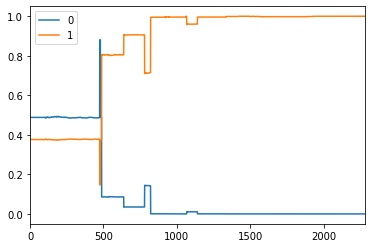

In [67]:
pd.DataFrame(predict_blue).plot()

In [68]:
predict_blue = pd.DataFrame(predict_blue)
predict_red = predict_blue[1]
predict_blue = predict_blue[0]

In [69]:
predict_blue

0       4.882056e-01
1       4.882056e-01
2       4.882056e-01
3       4.882056e-01
4       4.882056e-01
            ...     
2278    4.470348e-07
2279    4.470348e-07
2280    4.576523e-07
2281    4.575799e-07
2282    4.575450e-07
Name: 0, Length: 2283, dtype: float32

In [70]:
predict_red

0       0.376592
1       0.376592
2       0.376592
3       0.376592
4       0.376592
          ...   
2278    0.999965
2279    0.999965
2280    0.999965
2281    0.999965
2282    0.999965
Name: 1, Length: 2283, dtype: float32

In [71]:
predict_temp = list(predict_blue)
predict_temp.insert(0,0)
predict_temp.pop(-1)

4.575449850108271e-07

In [72]:
predict_blue = abs(np.array(predict_blue)-np.array(predict_temp))

In [73]:
predict_blue[0] = predict_blue[1]

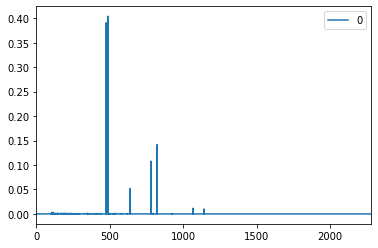

In [74]:
pd.DataFrame(predict_blue).plot()

In [75]:
predict_temp = list(predict_red)
predict_temp.insert(0,0)
predict_temp.pop(-1)

0.9999648332595825

In [76]:
predict_red = abs(np.array(predict_red)-np.array(predict_temp))

In [77]:
predict_red[0] = predict_red[1]

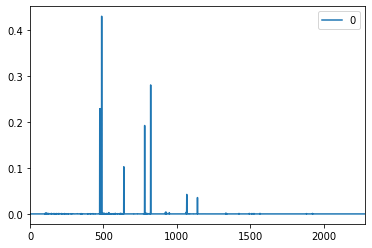

In [78]:
pd.DataFrame(predict_red).plot()

In [79]:
predict_delta = predict_blue+predict_red

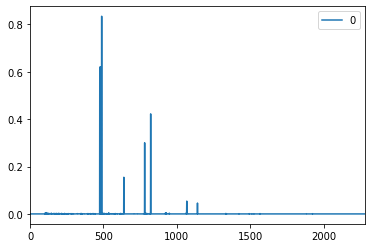

In [80]:
pd.DataFrame(predict_delta).plot()

In [81]:
highlight = []
for i,v in enumerate(predict_delta):
    if v>0.005:
        highlight.append(i)

In [82]:
highlight

[105, 114, 475, 476, 480, 488, 639, 781, 782, 822, 1068, 1141]

In [83]:
highlight_add

[1379, 1824, 1027, 1349, 1657, 1980, 2282]

In [84]:
for i in highlight:
    print(i//60, i%60)
print()
for i in highlight_add:
    print(i//60, i%60)

1 45
1 54
7 55
7 56
8 0
8 8
10 39
13 1
13 2
13 42
17 48
19 1

22 59
30 24
17 7
22 29
27 37
33 0
38 2
